En este codigo que hicieron la pruebas para poder leer los datos del archivo Geolife y poder representarlos en un mapa.

Los datos bienen datos en un formato muy diferente a los datos de trayectorias taxis, por lo que para introducirlo correctamente en la web final se deberian crear dos formas de introducir los datos o cambiar el formato de estos datos a mano o creando un codigo para hacerlo, lo cual seria muy tedioso.

Problemas encontrados: 
Se pueden ejecutar cada uno de los ficheros de datos por separado es decir el 001 por ejemplo pero no juntar mas de uno devido a que son de zonas
diferentes de china y su convinacion produce error en el mapa devido a su gran tamaño.
Durante el tratamiento de los datos estos no han funcionado como deberian, si se crea el geodataframe antes de transformarles en epsg 3857 estos daran infinito
mientras que al hacerlo al contrario tal cual esta hecho ahora el tiempo de ejecucion es mayor.

In [112]:
# import libraries
import pandas as pd
import geopandas as gpd 

import folium # sirve para hacer mapas interactivos
from folium import plugins 
from folium.plugins import HeatMap 

import matplotlib.pyplot as plt # superior en cuestion de rendimiento
import contextily as ctx # sirve para poner mapas de fondo
from pyproj import Transformer # sirve para transformar coordenadas

import seaborn as sns # para hacer graficos mas bonitos

import json 
import pydeck as pdk # for 3D maps, buen resultado, muy visual

from shapely.geometry import LineString, Point, box # sirve para hacer geometrias
import os
from pyproj import Proj, transform
from pyproj import Transformer
import numpy as np

In [113]:
nrows = 100000
# Ruta del archivo CSV
filename = "../train_data/taxis_trajectory/Geolife Trajectories 1.3/Data/160"

Ejecucion de 100000 2 min 37 segundos

In [114]:
def load_and_simplify_data(filename, rows, tolerance=0.0001):   
    # Lista para almacenar las listas de trayectorias (cada trayectoria es una lista de [latitud, longitud])
    trayectorias = []

    # Recorrer el directorio raíz, sus subdirectorios y archivos
    for subdir, _, files in os.walk(filename):
        for file in files:
            if len(trayectorias) > rows:
                return trayectorias
            # Comprobar si el archivo es un .plt
            if file.endswith('.plt'):
                file_path = os.path.join(subdir, file)
                # Leer los datos, saltándose las primeras 6 líneas de metadatos
                data = pd.read_csv(file_path, skiprows=6, header=None, names=['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time'])
                # Extraer las coordenadas como listas de [latitud, longitud]
                trayectoria = data[['Latitude', 'Longitude']].values.tolist()
                # Añadir esta trayectoria a la lista de trayectorias
                if len(trayectoria) > 2:
                    trayectorias.append(trayectoria)

    """ trayec = [[trayectoria] for trayectoria in trayectorias]
    df = pd.DataFrame(trayec, columns=['POLYLINE']) """

    """ # Filtrar polilíneas vacías o con un solo punto
    def create_line(points):
        # points = json.loads(x)
        if len(points) > 1:
            return LineString(points)
        return None

    df['geometry'] = df['POLYLINE'].apply(create_line)
    
    # Eliminar filas con geometrías nulas
    df = df[df['geometry'].notnull()]  
    
    
    points = gpd.points_from_xy(df['Longitude'], df['Latitude'])

    # Luego, crea el GeoDataFrame usando estos puntos como la geometría
    gdf = gpd.GeoDataFrame(df, geometry=points, crs="EPSG:4326") """
    

    """   geometry = [LineString(polyline) for polyline in df['POLYLINE'] if len(polyline) > 1]

    # Ahora, crea el GeoDataFrame pasando la serie de geometrías y especificando el CRS al mismo tiempo
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

    # Simplificar las geometrías
    gdf['geometry'] = gdf['geometry'].simplify(tolerance) 
    """
    return trayectorias

trayectorias = load_and_simplify_data(filename, nrows)
trayectorias

[[[13.366956, 103.850834],
  [13.367044, 103.850898],
  [13.367019, 103.850881],
  [13.366985, 103.850868],
  [13.366988, 103.850846],
  [13.366994, 103.850831],
  [13.366994, 103.850831],
  [13.366999, 103.850839],
  [13.367012, 103.850831],
  [13.367023, 103.850827],
  [13.367027, 103.850827],
  [13.367029, 103.850827],
  [13.367031, 103.850826],
  [13.367032, 103.850826],
  [13.367032, 103.850827],
  [13.367032, 103.850827],
  [13.367033, 103.850827],
  [13.367033, 103.850826],
  [13.367034, 103.850826],
  [13.367034, 103.850826],
  [13.367037, 103.850823],
  [13.367032, 103.850791],
  [13.367037, 103.850775],
  [13.367033, 103.850754],
  [13.367035, 103.850729],
  [13.367027, 103.850712],
  [13.367026, 103.850689],
  [13.367024, 103.850668],
  [13.367005, 103.850646],
  [13.366979, 103.850623],
  [13.366951, 103.850599],
  [13.366935, 103.850579],
  [13.366916, 103.850564],
  [13.366839, 103.850541],
  [13.366826, 103.850528],
  [13.366812, 103.850509],
  [13.366801, 103.850489],
 

In [115]:
""" #gdf_filtered = gdf.set_crs("EPSG:4326")

# Luego, usar estas coordenadas en la función de filtrado
# gdf_filtered = filter_data_in_area(gdf, minx, miny, maxx, maxy)

# Transforcion en EPSG:3857 para alinear con el mapa base de Contextily
gdf_calibrate =  gdf.to_crs(epsg=3854 )

gdf_calibrate.head() """

' #gdf_filtered = gdf.set_crs("EPSG:4326")\n\n# Luego, usar estas coordenadas en la función de filtrado\n# gdf_filtered = filter_data_in_area(gdf, minx, miny, maxx, maxy)\n\n# Transforcion en EPSG:3857 para alinear con el mapa base de Contextily\ngdf_calibrate =  gdf.to_crs(epsg=3854 )\n\ngdf_calibrate.head() '

In [116]:
""" # Crear una figura con Matplotlib
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
gdf_calibrate.plot(ax=ax, linewidth=0.5, color='blue')

# Añadir un mapa base con Contextily
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Guardar la imagen
plt.show() """

" # Crear una figura con Matplotlib\nfig, ax = plt.subplots(figsize=(10, 10), dpi=300)\ngdf_calibrate.plot(ax=ax, linewidth=0.5, color='blue')\n\n# Añadir un mapa base con Contextily\nctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)\n\n# Guardar la imagen\nplt.show() "

In [117]:
trayectorias.__len__()

3

In [118]:
""" points = list(zip(wellLoc.dd_lon,wellLoc.dd_lat))
coordsWgs = np.array(list(transformer.itransform(points))) """

' points = list(zip(wellLoc.dd_lon,wellLoc.dd_lat))\ncoordsWgs = np.array(list(transformer.itransform(points))) '

In [119]:
""" lineas = [LineString(trayectoria) for trayectoria in trayectorias]
gdf = gpd.GeoDataFrame(geometry=lineas)
gdf.head()  """

' lineas = [LineString(trayectoria) for trayectoria in trayectorias]\ngdf = gpd.GeoDataFrame(geometry=lineas)\ngdf.head()  '

In [120]:
""" def filter_data_in_area(gdf, minx, miny, maxx, maxy):
    # Crear un polígono de área de interés
    area_of_interest = box(minx, miny, maxx, maxy)
    
    # Filtrar los datos para incluir solo aquellos completamente dentro del área de interés
    gdf_filtered = gdf[gdf.geometry.within(area_of_interest)]
    
    return gdf_filtered """

' def filter_data_in_area(gdf, minx, miny, maxx, maxy):\n    # Crear un polígono de área de interés\n    area_of_interest = box(minx, miny, maxx, maxy)\n    \n    # Filtrar los datos para incluir solo aquellos completamente dentro del área de interés\n    gdf_filtered = gdf[gdf.geometry.within(area_of_interest)]\n    \n    return gdf_filtered '

In [121]:
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)

In [122]:
ta = []
t = []

In [123]:
def transformar_coordenadas(trayectorias):
    for trayectoria in trayectorias:
        for lat, lon in trayectoria:
            x, y = transformer.transform(lon, lat)
            ta.append([x, y])
        t.append(ta)
    return t    


Ejecucion 55 seg 100000 datos

In [124]:
# Llamar a la función con el ejemplo anterior
trayec = transformar_coordenadas(trayectorias)

trayec

[[[11560621.959336782, 1501687.4451641275],
  [11560629.083784193, 1501697.5140536493],
  [11560627.19135285, 1501694.653573298],
  [11560625.74419947, 1501690.7633204958],
  [11560623.295170672, 1501691.1065780742],
  [11560621.62537831, 1501691.7930932431],
  [11560621.62537831, 1501691.7930932431],
  [11560622.515934236, 1501692.3651892303],
  [11560621.62537831, 1501693.8526388528],
  [11560621.180100346, 1501695.1112501342],
  [11560621.180100346, 1501695.5689269784],
  [11560621.180100346, 1501695.7977654033],
  [11560621.068780856, 1501696.02660383],
  [11560621.068780856, 1501696.1410230438],
  [11560621.180100346, 1501696.1410230438],
  [11560621.180100346, 1501696.1410230438],
  [11560621.180100346, 1501696.2554422582],
  [11560621.068780856, 1501696.2554422582],
  [11560621.068780856, 1501696.3698614733],
  [11560621.068780856, 1501696.3698614733],
  [11560620.734822385, 1501696.7131191213],
  [11560617.172598679, 1501696.1410230438],
  [11560615.391486825, 1501696.713119121

28 minutos 1000 datos es escesivo

In [125]:
lineas = [LineString(trayectoria) for trayectoria in trayec]
gdf = gpd.GeoDataFrame(geometry=lineas)
gdf.head()

,geometry
0,"LINESTRING (11560621.959 1501687.445, 11560629..."
1,"LINESTRING (11560621.959 1501687.445, 11560629..."
2,"LINESTRING (11560621.959 1501687.445, 11560629..."


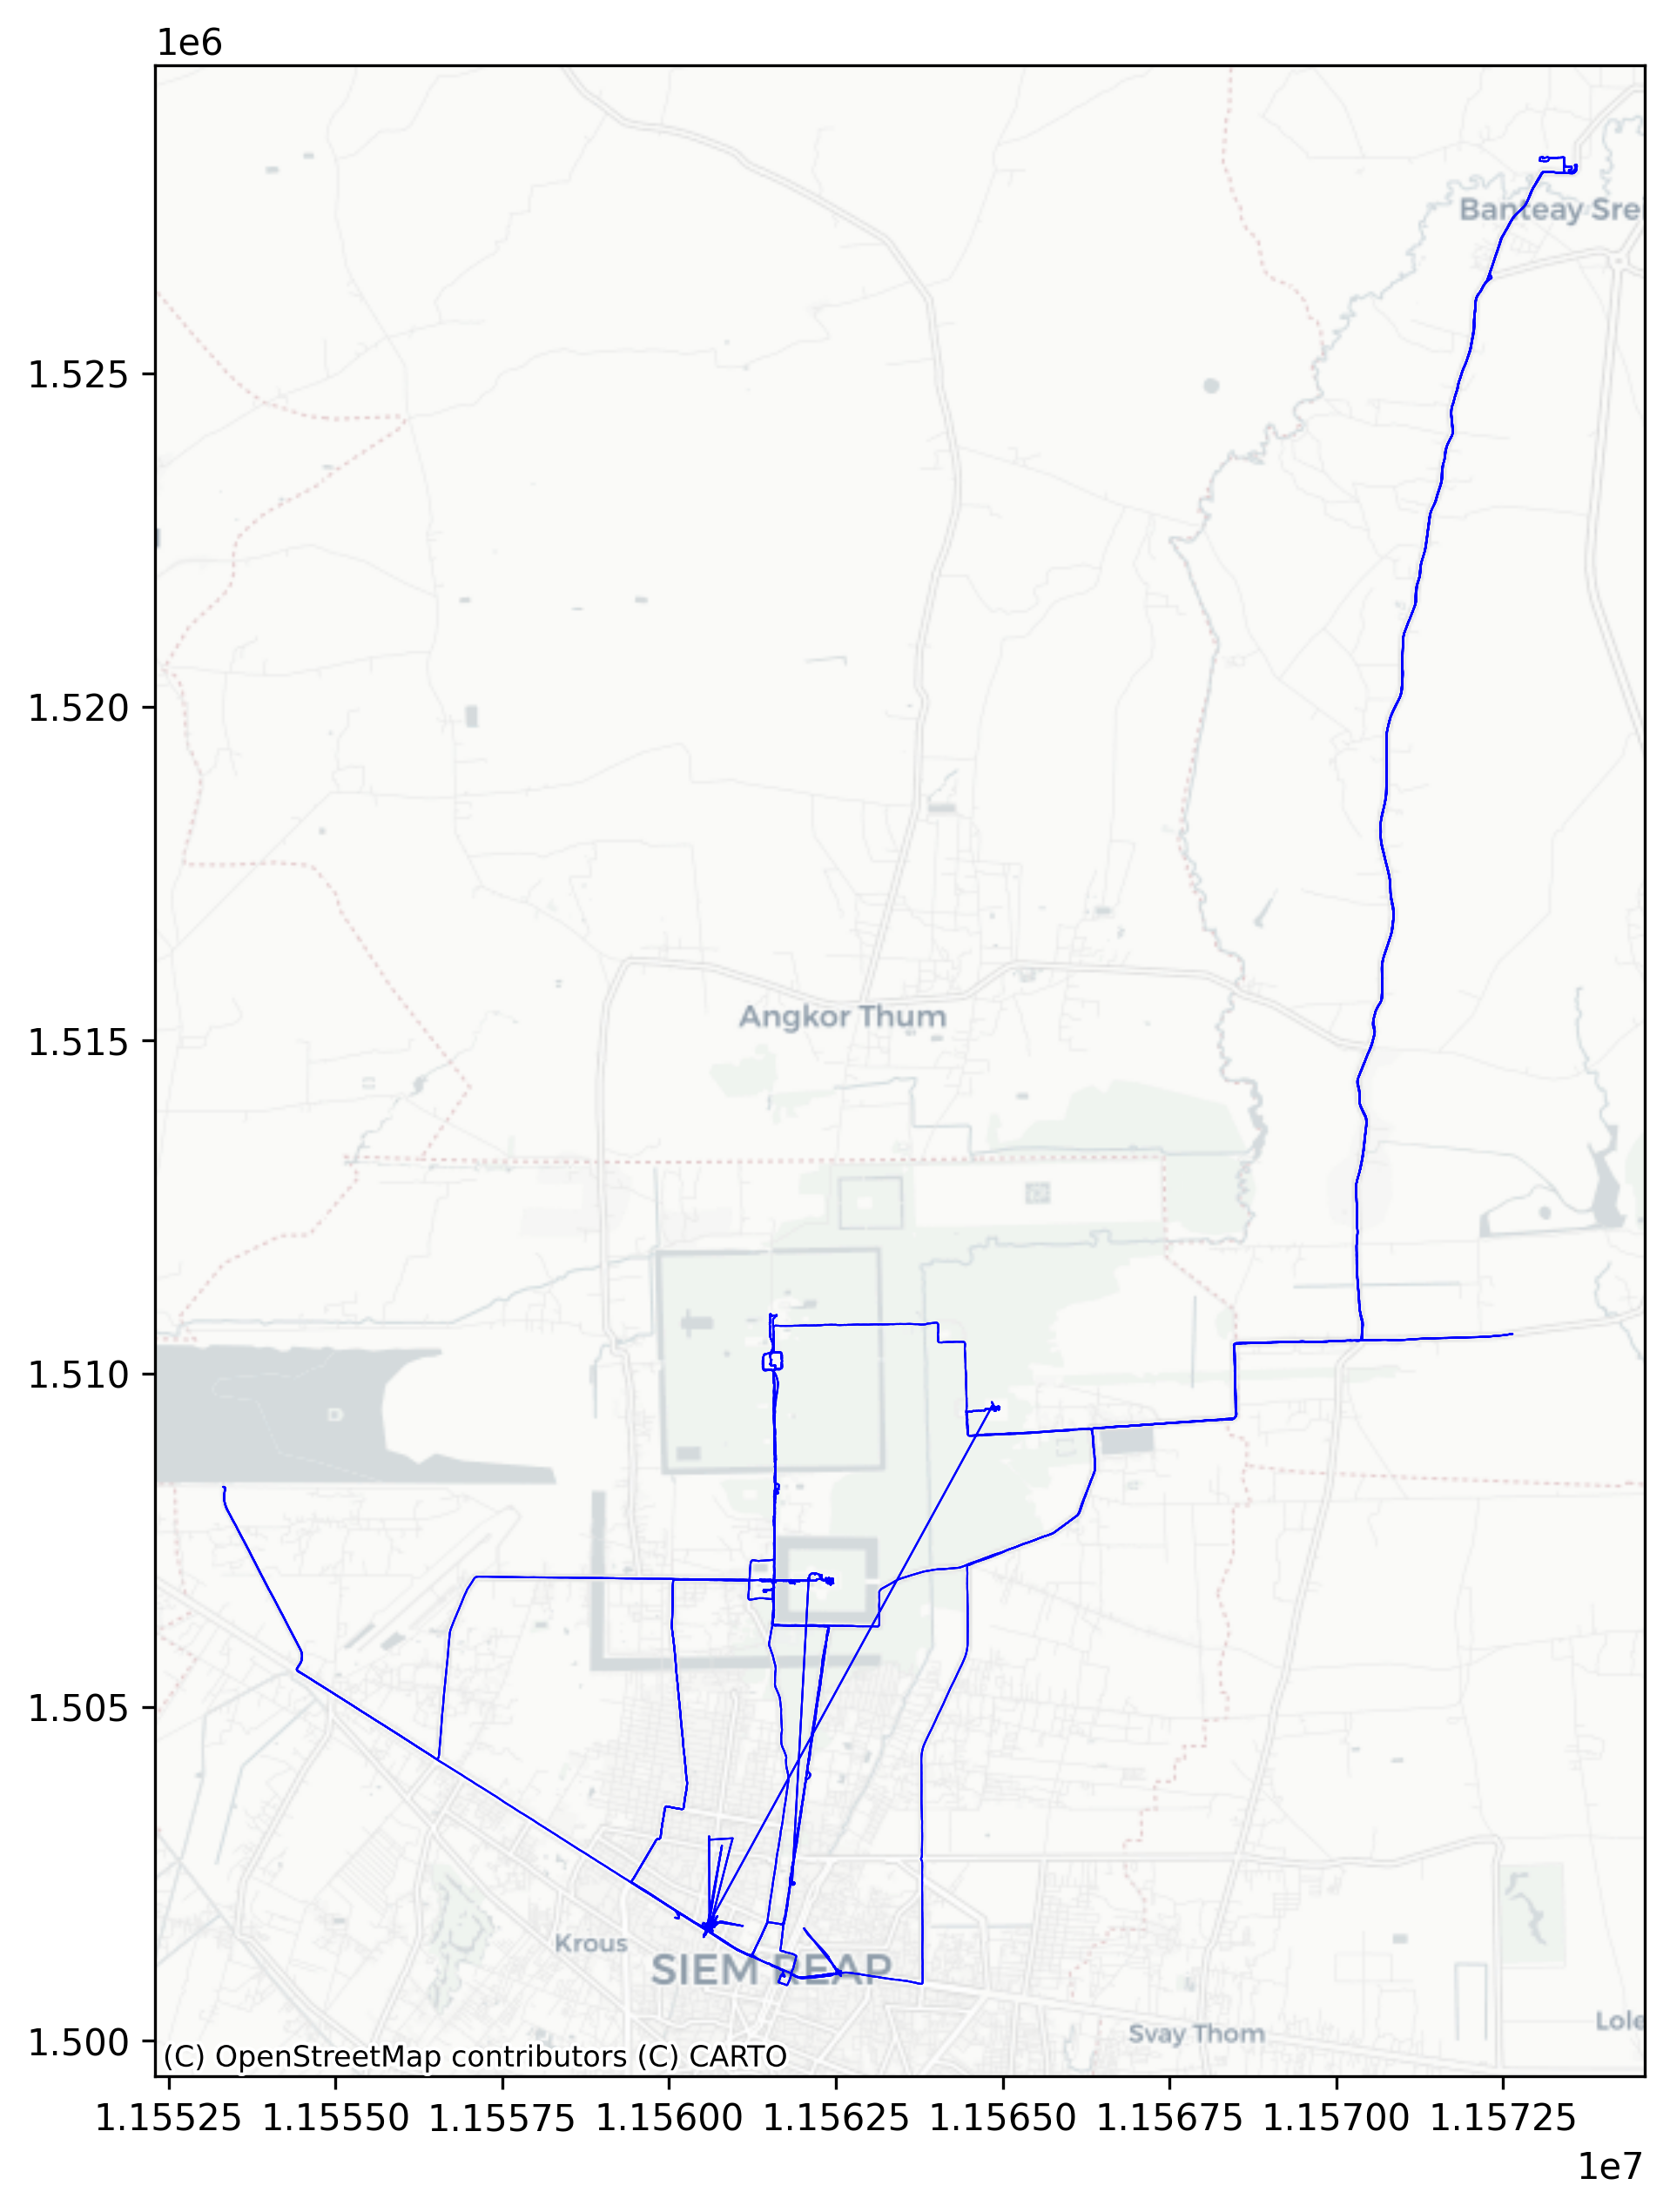

In [126]:
# Crear una figura con Matplotlib
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
gdf.plot(ax=ax, linewidth=0.5, color='blue')

# Añadir un mapa base con Contextily
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show() 

In [127]:
""" gdf = gdf.set_crs("EPSG:4326")

# Luego, usar estas coordenadas en la función de filtrado
#gdf_filtered = filter_data_in_area(gdf, minx, miny, maxx, maxy)

# Transforcion en EPSG:3857 para alinear con el mapa base de Contextily
gdf_calibrate = gdf.to_crs(epsg=3857)

# Crear una figura con Matplotlib
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
gdf_calibrate.plot(ax=ax, linewidth=0.5, color='blue')

# Añadir un mapa base con Contextily
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Guardar la imagen
plt.savefig('map_Geolife.png', bbox_inches='tight', pad_inches=0, transparent=True) """

' gdf = gdf.set_crs("EPSG:4326")\n\n# Luego, usar estas coordenadas en la función de filtrado\n#gdf_filtered = filter_data_in_area(gdf, minx, miny, maxx, maxy)\n\n# Transforcion en EPSG:3857 para alinear con el mapa base de Contextily\ngdf_calibrate = gdf.to_crs(epsg=3857)\n\n# Crear una figura con Matplotlib\nfig, ax = plt.subplots(figsize=(10, 10), dpi=300)\ngdf_calibrate.plot(ax=ax, linewidth=0.5, color=\'blue\')\n\n# Añadir un mapa base con Contextily\nctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)\n\n# Guardar la imagen\nplt.savefig(\'map_Geolife.png\', bbox_inches=\'tight\', pad_inches=0, transparent=True) '